In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
%matplotlib inline
%precision 3

df = pd.read_csv('D:/ExcelR/Assignments/Multiple Linear Regression/50_startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [429]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [430]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [431]:
# df.replace(0, np.nan, inplace=True)
# df

In [432]:
df.rename(columns={'R&D Spend': 'RnD', 'Marketing Spend': 'Marketing'}, inplace=True)
df.columns

Index(['RnD', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

In [433]:
# from sklearn.impute import SimpleImputer
# si = SimpleImputer(strategy='median')
# df[['RnD', 'Marketing']] = si.fit_transform(df[['RnD', 'Marketing']])

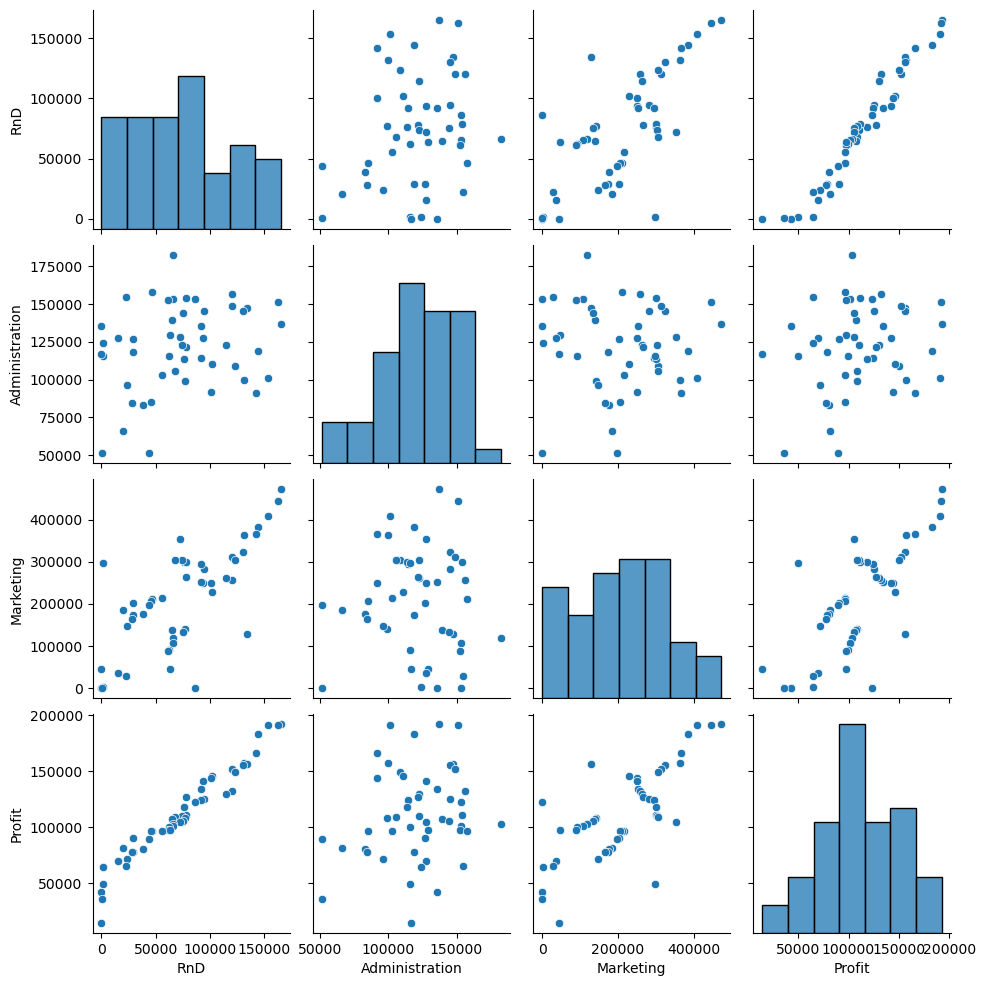

In [434]:
sns.pairplot(df)

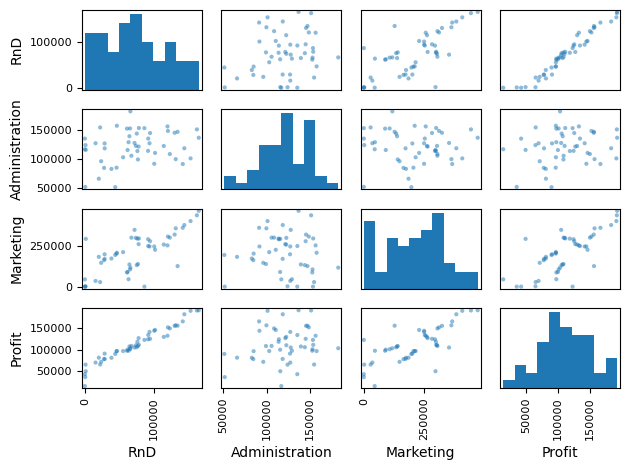

In [435]:
pd.plotting.scatter_matrix(df)
plt.tight_layout()

<AxesSubplot:>

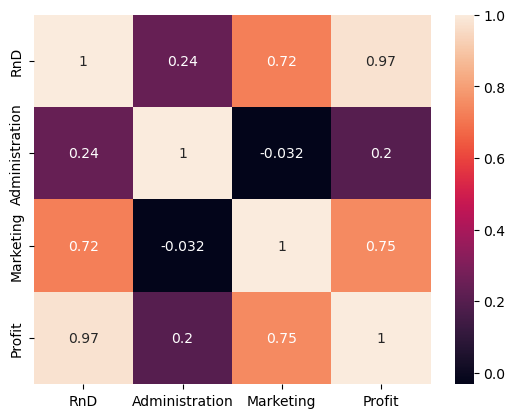

In [436]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

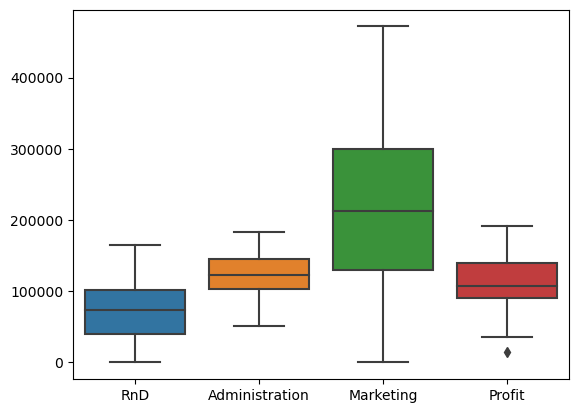

In [437]:
sns.boxplot(df)

### Model before removing outliers and using all the columns

In [438]:
model = smf.ols('Profit~Marketing+RnD+Administration', data=df).fit()
print(f'R2 value = {model.rsquared}') 
print(f'Adj R2 value = {model.rsquared_adj}\n') 
print(f'p-values:\n{model.pvalues}\n')
print(f't-values:\n{model.tvalues}')

R2 value = 0.9507459940683246
Adj R2 value = 0.9475337762901719

p-values:
Intercept         1.057379e-09
Marketing         1.047168e-01
RnD               2.634968e-22
Administration    6.017551e-01
dtype: float64

t-values:
Intercept          7.626218
Marketing          1.655077
RnD               17.846374
Administration    -0.525507
dtype: float64


#### From the p-values above we can see that Marketing and Administration features are not contributing to the model i.e. 
##### Null hypothesis(H0): B1 = 0
##### Alternate Hypothesis(H1): B1 != 0
##### Since p-values for Marketing and Administration are greater 0.05  we fail to reject H0, implying that the slope = 0

In [439]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        17:04:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
RnD                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can see that the R-squared value is good, but let's see if we can improve the value

## We'll see if removing outliers can make better our R-squared value or not

In [440]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

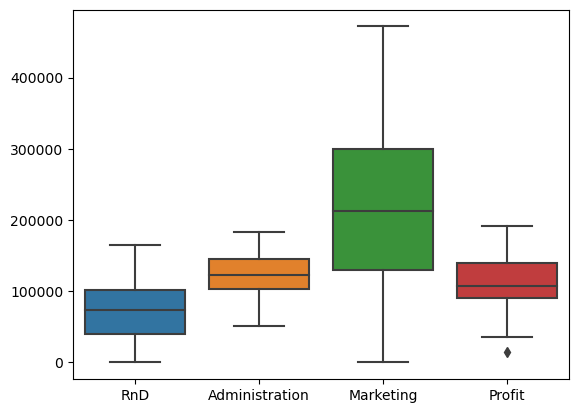

In [441]:
sns.boxplot(df)

### In the above plot, we can see that Profit column as an outlier
#### Calculating the lower range to find out the outlier

In [442]:
q1 = np.quantile(df['Profit'], 0.25)
q3 = np.quantile(df['Profit'], 0.75)

IQR = q3 - q1

lower_rnge = q1 - 1.5 * IQR
lower_rnge

15698.290000000023

In [443]:
df[df['Profit'] <= lower_rnge]

,RnD,Administration,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


#### After removing the outlier

In [444]:
df = df[df['Profit'] >= lower_rnge] # df.drop(49, axis=0, inplace=True)
df

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### Building a model with the outlier removed

In [445]:
model_1 = smf.ols('Profit~RnD+Marketing+Administration', data=df).fit()


In [446]:
print(f'R2 value = {model_1.rsquared}') 
print(f'Adj R2 value = {model_1.rsquared_adj}\n') 
print(f'p-values:\n{round(model_1.pvalues, 3)}\n')
print(f't-values:\n{round(model_1.tvalues, 3)}')

R2 value = 0.9613162435129847
Adj R2 value = 0.9587373264138503

p-values:
Intercept         0.000
RnD               0.000
Marketing         0.075
Administration    0.607
dtype: float64

t-values:
Intercept          9.451
RnD               20.470
Marketing          1.825
Administration    -0.518
dtype: float64


#### The p-values for Marketing and Administration are still greater than 0.05 which implies that the slope is 0
#### Hence we will create a model individually for Marketing and Administration

### Model with Marketing feature alone

In [447]:
model_mark = smf.ols('Profit~Marketing', data=df).fit()

In [448]:
model_mark.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.30e-09
Time:                        17:04:36   Log-Likelihood:                -566.59
No. Observations:                  49   AIC:                             1137.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.406e+04   7601.574      8.428      0.000    4.88e+04    7.94e+04
Marketing      0.2329      0.031      7.527      0.000       0.171       0.295
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [449]:
round(model_mark.pvalues, 3), model_mark.tvalues

(Intercept    0.0
 Marketing    0.0
 dtype: float64,
 Intercept    8.427541
 Marketing    7.526983
 dtype: float64)

#### Here p-value < 0.05 hence we can reject H0, so we can conclude that slope for Marketing != 0

### Model with Administration feature alone

In [450]:
model_admin = smf.ols('Profit~Administration', data=df).fit()

In [451]:
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Tue, 20 Dec 2022   Prob (F-statistic):              0.156
Time:                        17:04:36   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
Administration     0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [452]:
round(model_admin.pvalues, 3), model_admin.tvalues

(Intercept         0.002
 Administration    0.156
 dtype: float64,
 Intercept         3.346236
 Administration    1.442053
 dtype: float64)

#### We can see that p-value > 0.05 so we fail to reject H0, which means that slope for Administration = 0

#### Since slope for Administration = 0 let's see if removing the column affects our rsquared value or not

In [453]:
model_2 = smf.ols('Profit~Marketing+RnD', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           3.74e-33
Time:                        17:04:36   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [466]:
model_2.rsquared

0.9610856807456628

In [454]:
r_df = pd.DataFrame({'R-Squred': [model_1.rsquared, model_2.rsquared], 'R-Squared Adjusted': [model_1.rsquared_adj, model_2.rsquared_adj]}, index=['Marketing, RnD, Administraion', 'Marketing, RnD'])
r_df

,R-Squred,R-Squared Adjusted
"Marketing, RnD, Administraion",0.961316,0.958737
"Marketing, RnD",0.961086,0.959394


#### As we can see that R-squared value is almost the same, but r-squared adjusted increase by some amount when we don't consider Administration
#### Preparing the final model

In [474]:
df_1 = df.drop(['Administration', 'State'], axis=1)

In [475]:
from sklearn.metrics import r2_score
x = df_1.iloc[:, :2]
y = df_1.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [476]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [477]:
y_pred = reg.predict(x_test)
y_pred

array([115244.134,  92086.63 ,  85202.931,  51886.152, 177915.865,
       170426.017,  73251.613, 103726.309,  52282.166, 100578.275])

In [478]:
pd.DataFrame({'Y Test': y_test, 'Y Pred': y_pred})

,Y Test,Y Pred
27,105008.31,115244.134010
34,96712.80,92086.629889
39,81005.76,85202.930933
48,35673.41,51886.152213
2,191050.39,177915.865271
3,182901.99,170426.016935
42,71498.49,73251.613496
29,101004.64,103726.308950
45,64926.08,52282.165691
30,99937.59,100578.274996


In [479]:
r2_score(y_test, y_pred)

0.9581775719373827

#### Table with R2 values

In [465]:
r_df

,R-Squred,R-Squared Adjusted
"Marketing, RnD, Administraion",0.961316,0.958737
"Marketing, RnD",0.961086,0.959394
